In [1]:
from importlib import reload
from libs import io , cv2 , np

import preprocessing as pp
import roi as roi
import detection as detect
from classifier import H3T_Classifier
from numbers_classifier import H3T_Numbers_Classifier
import videoread as vr
import cameraread as cr
from skimage import filters


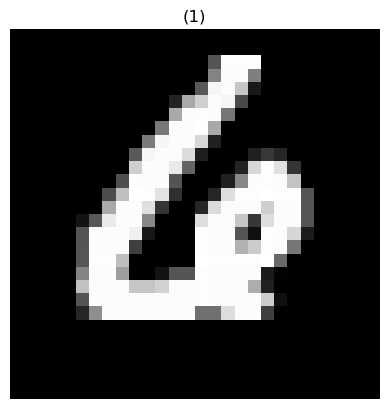

6.0


In [59]:
from scipy.io import loadmat
mnist = loadmat("../dataset/new_numbers/mnist-original.mat")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]
pp.show_images([mnist_data[40000].reshape(28 , 28)])
print(mnist_label[40000])

In [55]:

reload(roi)
reload(detect)
reload(vr)
reload(cr)

<module 'cameraread' from 'd:\\Ahmed Ameen\\Image processing\\Project\\Code\\Hdy_3sahn_T3dy\\full_pipeline\\cameraread.py'>

In [2]:
# INIT

sign_imgs_corr = detect.get_corrleation_matrices("../dataset/corr_signs")


In [ ]:

classifier = H3T_Classifier()


In [ ]:
classifier.prepare_training_data("../dataset/numbers_training_set")
classifier.train("svm")


In [ ]:

classifier.save_trained_model()

In [ ]:

classifier.load_trained_model()


In [3]:
numbers_classifier = H3T_Numbers_Classifier()

In [4]:
numbers_classifier.load_dataset()
# numbers_classifier.prepare_training_data("../dataset/numbers_training_set")


In [5]:
numbers_classifier.train("svm")

In [6]:
numbers_classifier.save_trained_model()

In [7]:
numbers_classifier.load_trained_model()

In [8]:
video_path = '../dataset/videos/IMG_5107.MOV'
video_frames_folder = '../dataset/video_frames'
vr.clear_folder(video_frames_folder)
video_frames = vr.extract_frames(video_path, video_frames_folder, fps=15)

Frame 0 saved to ../dataset/video_frames/frame_0.jpg
Frame 15 saved to ../dataset/video_frames/frame_15.jpg
Frame 30 saved to ../dataset/video_frames/frame_30.jpg
Frame 45 saved to ../dataset/video_frames/frame_45.jpg
Frame 60 saved to ../dataset/video_frames/frame_60.jpg
Frame 75 saved to ../dataset/video_frames/frame_75.jpg
Frame 90 saved to ../dataset/video_frames/frame_90.jpg
Frame 105 saved to ../dataset/video_frames/frame_105.jpg
Frame 120 saved to ../dataset/video_frames/frame_120.jpg
Frame 135 saved to ../dataset/video_frames/frame_135.jpg
Frame 150 saved to ../dataset/video_frames/frame_150.jpg
Frame 165 saved to ../dataset/video_frames/frame_165.jpg
Frame 180 saved to ../dataset/video_frames/frame_180.jpg
Frame 195 saved to ../dataset/video_frames/frame_195.jpg
Frame 210 saved to ../dataset/video_frames/frame_210.jpg
Frame 225 saved to ../dataset/video_frames/frame_225.jpg
Frame 240 saved to ../dataset/video_frames/frame_240.jpg
Frame 255 saved to ../dataset/video_frames/fram

In [57]:
# cr.capture_frames_from_camera()

In [ ]:
from skimage.feature import hog
image = io.imread("../speed_classification/road_sign_dataset/training_set/speed_50/50 (30).png")
resized_img = cv2.resize(image, (128, 128))
gray_image = pp.gray_image(resized_img)   
feature_vector , transformed_hog = hog(gray_image , visualize = True  , pixels_per_cell=(8 , 8) , cells_per_block=(4 , 4) , transform_sqrt=True)
pp.show_images([gray_image, transformed_hog])

In [9]:
# image = io.imread("../dataset/screenshots/3.jpg")
image = video_frames[-7]

In [10]:
# Load the image
# image = io.imread("../dataset/tc/00173.jpg")


In [11]:

resized_img = cv2.resize(image, (1280, 720))

#pp.show_images([image], ["Input Image"])

cropped_img = cv2.hconcat([resized_img[:, :(resized_img.shape[1] // 3)]  , resized_img[:, 2 * (resized_img.shape[1] // 3):]])

# Convert the image to grayscale
gray_image = pp.gray_image(resized_img)

equalized_image = pp.HistogramEqualization(gray_image)

# Apply edge detection
edge_image = pp.LoGEdgeDetection(equalized_image)

# show pp images
#pp.show_images([resized_img, image, cropped_img], ["Input Image", "Cropped Image", "Edge Image"])


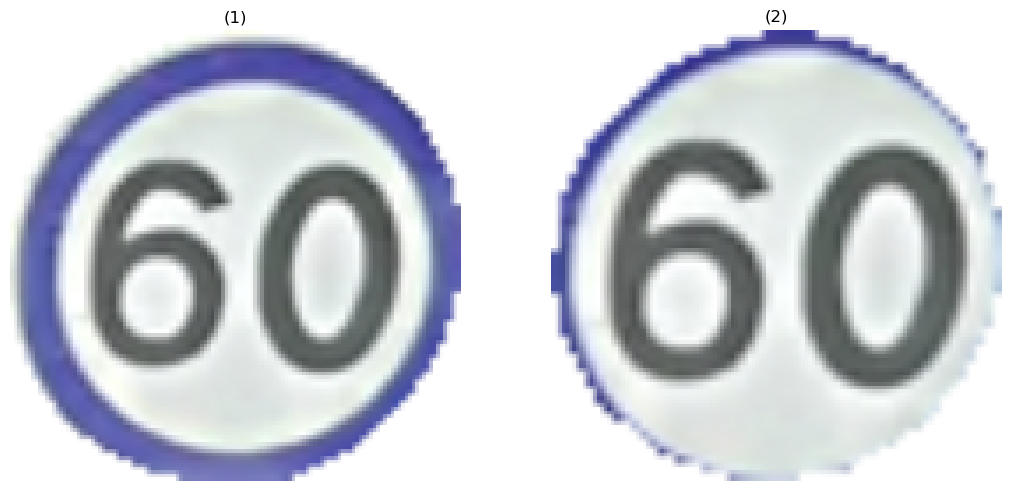

In [12]:

# Extract ROIs
rois = roi.extract_roi(edge_image , resized_img)

# print(rois[0].shape)
#show rois

# new_images = []
# for i in range(len(rois)):
#     #  rois[i] = pp.gray_image(rois[i])
#      new_images.append(pp.HistogramEqualization(rois[i]))

pp.show_images(rois)

0.31525320725934525
0.31546423880448354
0.26335496651018303
0.319258343064495
0.34148932550674505
0.2678003850247193
[6, 0]
0


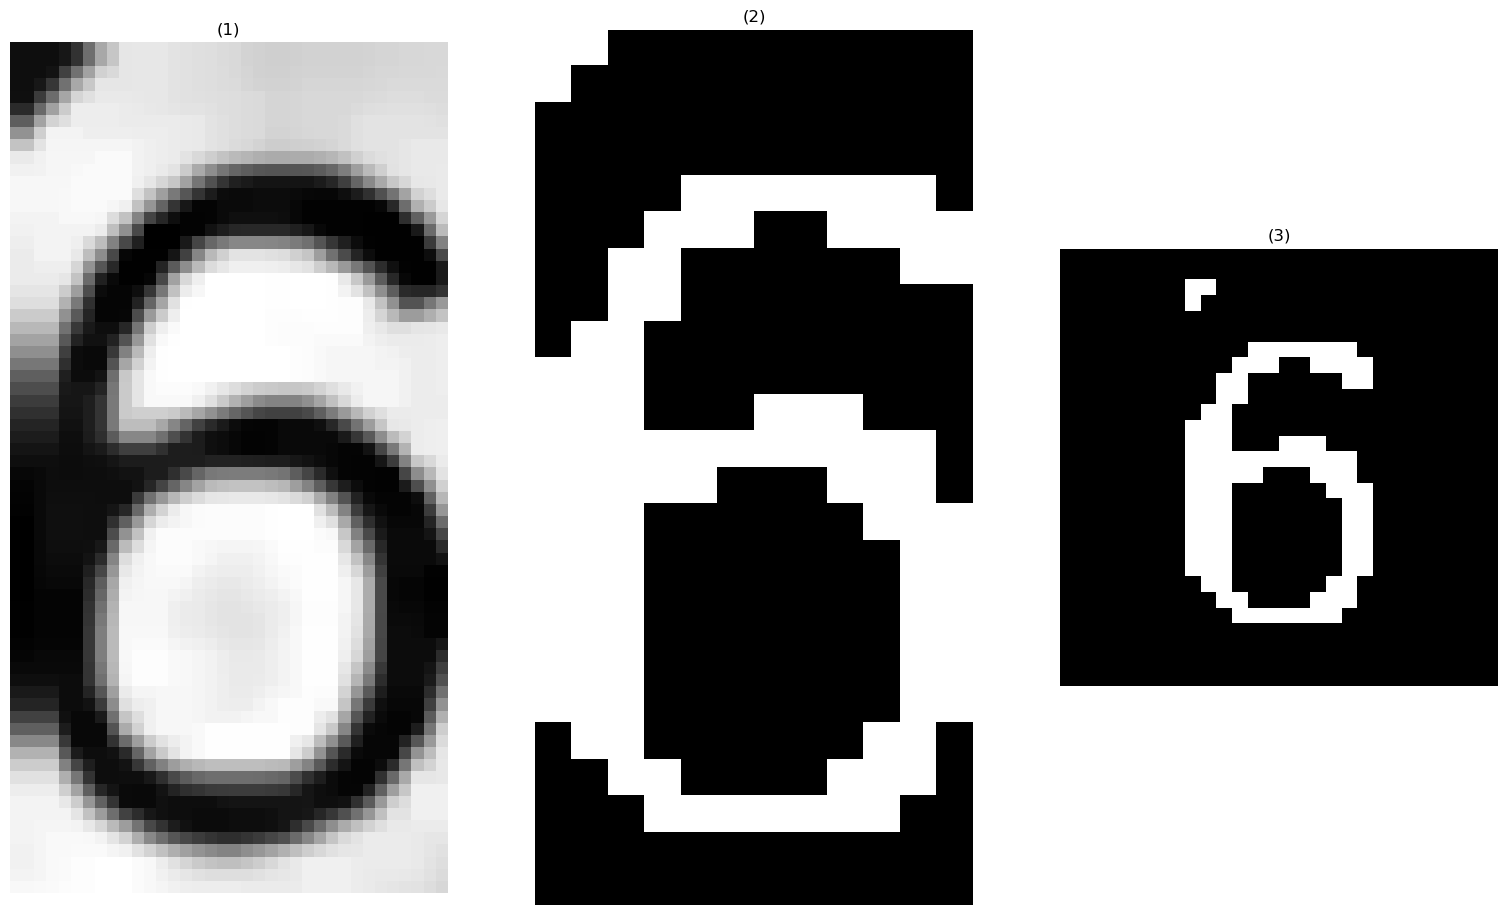

prediction is [5.]


In [14]:
if (len(rois)  == 0):
    print("no rois")
else:
    detected_image_index = detect.detect_sign(rois, sign_imgs_corr)
    print(detected_image_index) 
    if detected_image_index != -1:
        
        # feature_vector , transformed_hog = hog(rois[detected_image_index] , visualize = True , channel_axis=2  , pixels_per_cell=(16, 16) , transform_sqrt=True)
        # pp.show_images([rois[detected_image_index], transformed_hog])

        # red_channel = colored_image[:, :, 0]
        # green_channel = colored_image[:, :, 1]
        # blue_channel = colored_image[:, :, 2]

        # new_image = red_channel.copy()

        # for i in range(new_image.shape[0]):
        #     for j in range(new_image.shape[1]):
        #         if (red_channel[i][j]  < 200 and green_channel[i][j] < 200 and blue_channel[i][j] < 200):
        #             new_image[i][j] = 255
        #         else:
        #             new_image[i][j] = 0

        new_image = pp.gray_image(rois[detected_image_index])

        

        
        new_image = new_image[ 30:100 , 25:61 ]

        #perform closing
        kernel = np.ones((2,2), np.uint8)
        new_image = cv2.dilate(new_image, kernel, iterations=3)
        new_image = cv2.erode(new_image, kernel, iterations=1)
        
        thrsholded_image = np.zeros_like(new_image)
        threshold = filters.threshold_otsu(new_image)
        thrsholded_image[new_image <= threshold] = 1
        thrsholded_image = cv2.resize(thrsholded_image , (12, 24)).astype(np.uint8)
        
        new_black_image = np.zeros((28, 28))
        new_black_image[2:2+thrsholded_image.shape[0] , 8:8+thrsholded_image.shape[1]] = thrsholded_image
        # new_black_image = filters.gaussian(new_black_image , sigma=1)

        # # apply dilation
        # kernel = np.ones((2, 2), np.uint8)
        # new_black_image = cv2.dilate(new_black_image, kernel, iterations=1)

        
        pp.show_images([new_image , thrsholded_image , new_black_image])




        # gray_roi = pp.gray_image(rois[detected_image_index])
        
        # gray_roi = pp.HistogramEqualization(gray_roi)

        # new_image = gray_roi[ 20:100 , 15:110 ]

        # first_digit = new_image[: , 0:new_image.shape[0]//2]

        # pp.show_images([gray_roi , new_image , first_digit], ["sign_detected" , "new_image" , "first digit"]) 
        
        # print(gray_roi.shape)
        print(f'prediction is {numbers_classifier.predict(new_black_image)}')
    else:
        print("no sign detected")
